In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
import csv

In [2]:
# open the dataset
with open('OntarioCoronavirus.csv', 'r') as f:
    cases = list(csv.reader(f, delimiter=','))

In [3]:
# get only the cases and days columns without the header
cases_col_name = "Ontario Cases"
days_col_name = "Days since start"
cases_col_num = cases[0].index(cases_col_name)
days_col_num = cases[0].index(days_col_name)
cases = cases[1:]
cases = [[int(case[cases_col_num]), int(case[days_col_num])] for case in cases]
print(cases[:3])

[[1, 0], [2, 2], [3, 6]]


In [4]:
# convert to np
cases_array = np.array(cases[3:], dtype=np.float)
x = cases_array[:,1]
y = cases_array[:,0]

In [5]:
# fit exponential
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(exponential, x, y, p0=[0,0,0])
residuals = y - exponential(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.9700188424088629


In [6]:
# fit logistic
# def logistic(x, a, b, c):
#     return a / (1 + np.exp(-b * (x - c)))

# l_popt, l_pcov = curve_fit(logistic, x, y, p0=[3,3,3])
# l_residuals = y - logistic(x, *popt)
# l_ss_res = np.sum(l_residuals**2)
# l_ss_tot = np.sum((y-np.mean(y))**2)
# l_r_squared = 1 - (l_ss_res / l_ss_tot)
# print(l_r_squared)

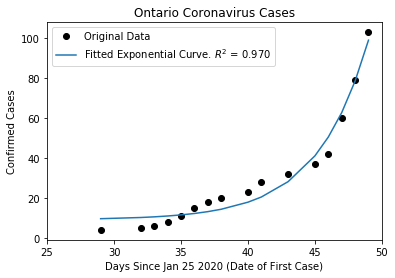

In [7]:
# plot
plt.figure()
plt.plot(x, y, 'ko', 
         label="Original Data")
plt.plot(x, exponential(x, *popt), 
         label="Fitted Exponential Curve. $R^2$ = {:.3f}"
         .format(r_squared))
# plt.plot(cases_array[:,1], logistic(cases_array[:,1], *l_popt), 
#          label="Fitted Logistic Curve")
plt.legend()
plt.title("Ontario Coronavirus Cases")
plt.ylabel("Confirmed Cases")
plt.xlabel("Days Since Jan 25 2020 (Date of First Case)")
xticks = np.array([i * 5 for i in range(math.ceil(max(x) / 5) + 1) if i >= 5])
plt.xticks(xticks, xticks)
plt.show()

In [8]:
# predict number of cases for the next day
dates_with_tomorrow = np.append(x, max(x)+1)
exponential_prediction = exponential(dates_with_tomorrow, *popt)[-1]
print("Exponential prediction for the next day: {:.0f} confirmed cases"
      .format(round(exponential_prediction)))

Exponential prediction for the next day: 126 confirmed cases
